In [1]:
import os
import gc
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/GonieAhn/Data-Science-online-course-from-gonie/main/Data%20Store/example_data.csv")

In [3]:
data.describe()

,censor,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,...,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,0.340226,801.236842,35.225564,76.061855,0.078947,0.640977,0.118421,95.432331,0.030075,0.546992,...,0.812030,0.580827,1.981203,0.167293,353.204887,336.139098,173.146617,0.603383,987.250000,928.214286
std,0.474231,326.887929,8.852094,13.224698,0.269910,0.480165,0.323410,5.981856,0.170955,0.498255,...,0.391056,0.493888,0.905946,0.373589,114.105253,130.961573,191.455406,0.489656,475.223907,438.569798
min,0.000000,33.000000,13.000000,47.401000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,103.000000,49.000000,-1.000000,0.000000,221.000000,150.000000
25%,0.000000,535.750000,29.000000,67.500000,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,271.000000,243.750000,-1.000000,0.000000,653.250000,626.500000
50%,0.000000,933.500000,34.000000,74.600000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,0.000000,346.000000,330.500000,113.000000,1.000000,881.000000,818.000000
75%,1.000000,1081.000000,40.000000,83.502000,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,1.000000,3.000000,0.000000,422.000000,418.000000,324.000000,1.000000,1190.000000,1164.000000
max,1.000000,1231.000000,70.000000,149.000000,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,1.000000,3.000000,1.000000,771.000000,909.000000,857.000000,1.000000,4255.000000,3130.000000


In [4]:
Y = data['censor']
X = data.drop(columns=['censor'])

In [5]:
Y.head()

0    0
1    1
2    0
3    1
4    1
Name: censor, dtype: int64

In [6]:
X.head()

,event,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,zprior,...,gender,str2,strat,symptom,cd40,cd420,cd496,r,cd80,cd820
0,1090,43,66.679,0,1,0,100,0,1,1,...,1,1,3,0,504,353,660,1,870,782
1,794,31,73.030,0,1,0,100,0,1,1,...,1,1,3,0,244,225,106,1,708,699
2,957,41,66.226,0,1,1,100,0,1,1,...,1,1,3,0,401,366,453,1,889,720
3,188,35,78.019,0,1,0,100,0,1,1,...,1,1,3,0,221,132,-1,0,221,759
4,308,40,83.009,0,1,0,100,0,1,1,...,1,1,3,1,150,90,20,1,1730,1160


In [7]:
idx = list(range(X.shape[0]))
train_idx, valid_idx = train_test_split(idx, test_size=0.3, random_state=2024)

In [8]:
print("Size of Train data: {}".format(len(train_idx)))
print("Size of Test data: {}".format(len(valid_idx)))

Size of Train data: 372
Size of Test data: 160


In [9]:
print("Size of Train Y data: {}".format(Counter(Y.iloc[train_idx])))
print("Size of Test Y data: {}".format(Counter(Y.iloc[valid_idx])))

Size of Train Y data: Counter({0: 248, 1: 124})
Size of Test Y data: Counter({0: 103, 1: 57})


In [10]:
estimators = [10, 20, 50]
learning = [0.05, 0.1, 0.5]
subsam = [0.5, 0.75, 1]

save_est = []
save_lr = []
save_sub = []
f1_score_ = []

cnt = 0
for est in estimators:
    for lr in learning:
        for sub in subsam:
            print(">>> {} <<<".format(cnt))
            cnt += 1
            print("Number of Estimators : {}, Learning Rate : {}, Subsample : {}".format(est, lr, sub))
            
            model = GradientBoostingClassifier(n_estimators=est, 
                                               learning_rate=lr, 
                                               subsample=sub,
                                               random_state=119)
            model.fit(X.iloc[train_idx], Y.iloc[train_idx])

            # Train Acc
            y_pre_train = model.predict(X.iloc[train_idx])
            cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
            print("Train Confusion Matrix")
            print(cm_train)
            print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
            print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

            # Test Acc
            y_pre_test = model.predict(X.iloc[valid_idx])
            cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
            print("Test Confusion Matrix")
            print(cm_test)
            print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
            print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))
            print("-----------------------------------------------------------------------")
            print("-----------------------------------------------------------------------")
            save_est.append(est)
            save_lr.append(lr)
            save_sub.append(sub)
            f1_score_.append(f1_score(Y.iloc[valid_idx], y_pre_test))

>>> 0 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 0.5
Train Confusion Matrix
[[248   0]
 [ 71  53]]
Train Acc : 0.8091397849462365
Train F1-Score : 0.5988700564971752
Test Confusion Matrix
[[102   1]
 [ 25  32]]
TesT Acc : 0.8375
Test F1-Score : 0.711111111111111
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 1 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 0.75
Train Confusion Matrix
[[245   3]
 [ 57  67]]
Train Acc : 0.8387096774193549
Train F1-Score : 0.6907216494845361
Test Confusion Matrix
[[102   1]
 [ 22  35]]
TesT Acc : 0.85625
Test F1-Score : 0.7526881720430108
-----------------------------------------------------------------------
-----------------------------------------------------------------------
>>> 2 <<<
Number of Estimators : 10, Learning Rate : 0.05, Subsample : 1
Train Confusion Matrix
[[248   0]
 [ 57  67]]
Train Acc : 0.846774

In [14]:
for idx, value in enumerate(f1_score_):
    print(f"{idx} : {value}")

0 : 0.711111111111111
1 : 0.7526881720430108
2 : 0.7659574468085106
3 : 0.7999999999999999
4 : 0.7647058823529413
5 : 0.8076923076923077
6 : 0.7567567567567567
7 : 0.7894736842105263
8 : 0.8073394495412844
9 : 0.819047619047619
10 : 0.803921568627451
11 : 0.8155339805825242
12 : 0.8495575221238938
13 : 0.8648648648648649
14 : 0.8571428571428571
15 : 0.7894736842105263
16 : 0.7787610619469025
17 : 0.8108108108108109
18 : 0.8849557522123894
19 : 0.8672566371681416
20 : 0.8571428571428571
21 : 0.8073394495412844
22 : 0.8288288288288288
23 : 0.8571428571428571
24 : 0.7818181818181817
25 : 0.7719298245614035
26 : 0.7889908256880734


In [15]:
np.argmax(f1_score_)

18

In [11]:
print(">>> {} <<<\nBest Test f1-score : {}\nBest n_estimators : {}\nBest SubSampling : {}\nBest Learning Rate : {}".format(np.argmax(f1_score_),
                                                                                                                           f1_score_[np.argmax(f1_score_)], 
                                                                                                                           save_est[np.argmax(f1_score_)],
                                                                                                                           save_sub[np.argmax(f1_score_)],
                                                                                                                           save_lr[np.argmax(f1_score_)]))

>>> 18 <<<
Best Test f1-score : 0.8849557522123894
Best n_estimators : 50
Best SubSampling : 0.5
Best Learning Rate : 0.05


In [20]:
print(f">>> {np.argmax(f1_score_)} <<<\n Best Test f1-score : {f1_score_[np.argmax(f1_score_)]}")

>>> 18 <<<
 Best Test f1-score : 0.8849557522123894


In [21]:
best_model = GradientBoostingClassifier(n_estimators=save_est[np.argmax(f1_score_)], 
                                        learning_rate=save_lr[np.argmax(f1_score_)],
                                        subsample = save_sub[np.argmax(f1_score_)], 
                                        random_state=119)
best_model.fit(X.iloc[train_idx], Y.iloc[train_idx])

# Train Acc
y_pre_train = best_model.predict(X.iloc[train_idx])
cm_train = confusion_matrix(Y.iloc[train_idx], y_pre_train)
print("Train Confusion Matrix")
print(cm_train)
print("Train Acc : {}".format((cm_train[0,0] + cm_train[1,1])/cm_train.sum()))
print("Train F1-Score : {}".format(f1_score(Y.iloc[train_idx], y_pre_train)))

# Test Acc
y_pre_test = best_model.predict(X.iloc[valid_idx])
cm_test = confusion_matrix(Y.iloc[valid_idx], y_pre_test)
print("Test Confusion Matrix")
print(cm_test)
print("TesT Acc : {}".format((cm_test[0,0] + cm_test[1,1])/cm_test.sum()))
print("Test F1-Score : {}".format(f1_score(Y.iloc[valid_idx], y_pre_test)))

Train Confusion Matrix
[[236  12]
 [  7 117]]
Train Acc : 0.9489247311827957
Train F1-Score : 0.9249011857707509
Test Confusion Matrix
[[97  6]
 [ 7 50]]
TesT Acc : 0.91875
Test F1-Score : 0.8849557522123894


In [22]:
best_model.feature_importances_

array([5.56347546e-01, 5.54583506e-02, 6.90193497e-02, 2.68502796e-03,
       4.46010245e-03, 1.08735424e-03, 3.14093485e-05, 2.83825610e-03,
       0.00000000e+00, 0.00000000e+00, 5.11017820e-02, 3.23176935e-02,
       0.00000000e+00, 1.08028634e-03, 2.67292808e-03, 0.00000000e+00,
       2.46939910e-02, 6.37897324e-02, 4.60668345e-02, 3.50106323e-02,
       3.85577539e-02, 1.27809697e-02])

In [34]:
tmp = zip(best_model.feature_importances_, X.columns)

In [25]:
tmp

In [33]:
sorted(tmp, reverse=True)

[]

In [35]:
map = pd.DataFrame(sorted(tmp, reverse=True), columns=["column1", "column2"])

In [36]:
print(map)

     column1  column2
0   0.556348    event
1   0.069019     wtkg
2   0.063790    cd420
3   0.055458      age
4   0.051102  preanti
5   0.046067    cd496
6   0.038558     cd80
7   0.035011        r
8   0.032318     race
9   0.024694     cd40
10  0.012781    cd820
11  0.004460     homo
12  0.002838   oprior
13  0.002685     hemo
14  0.002673    strat
15  0.001087    drugs
16  0.001080     str2
17  0.000031   karnof
18  0.000000   zprior
19  0.000000      z30
20  0.000000  symptom
21  0.000000   gender


In [37]:
feature_map = pd.DataFrame(sorted(zip(best_model.feature_importances_, X.columns), reverse=True), columns=['Score', 'Feature'])
print(feature_map)

       Score  Feature
0   0.556348    event
1   0.069019     wtkg
2   0.063790    cd420
3   0.055458      age
4   0.051102  preanti
5   0.046067    cd496
6   0.038558     cd80
7   0.035011        r
8   0.032318     race
9   0.024694     cd40
10  0.012781    cd820
11  0.004460     homo
12  0.002838   oprior
13  0.002685     hemo
14  0.002673    strat
15  0.001087    drugs
16  0.001080     str2
17  0.000031   karnof
18  0.000000   zprior
19  0.000000      z30
20  0.000000  symptom
21  0.000000   gender


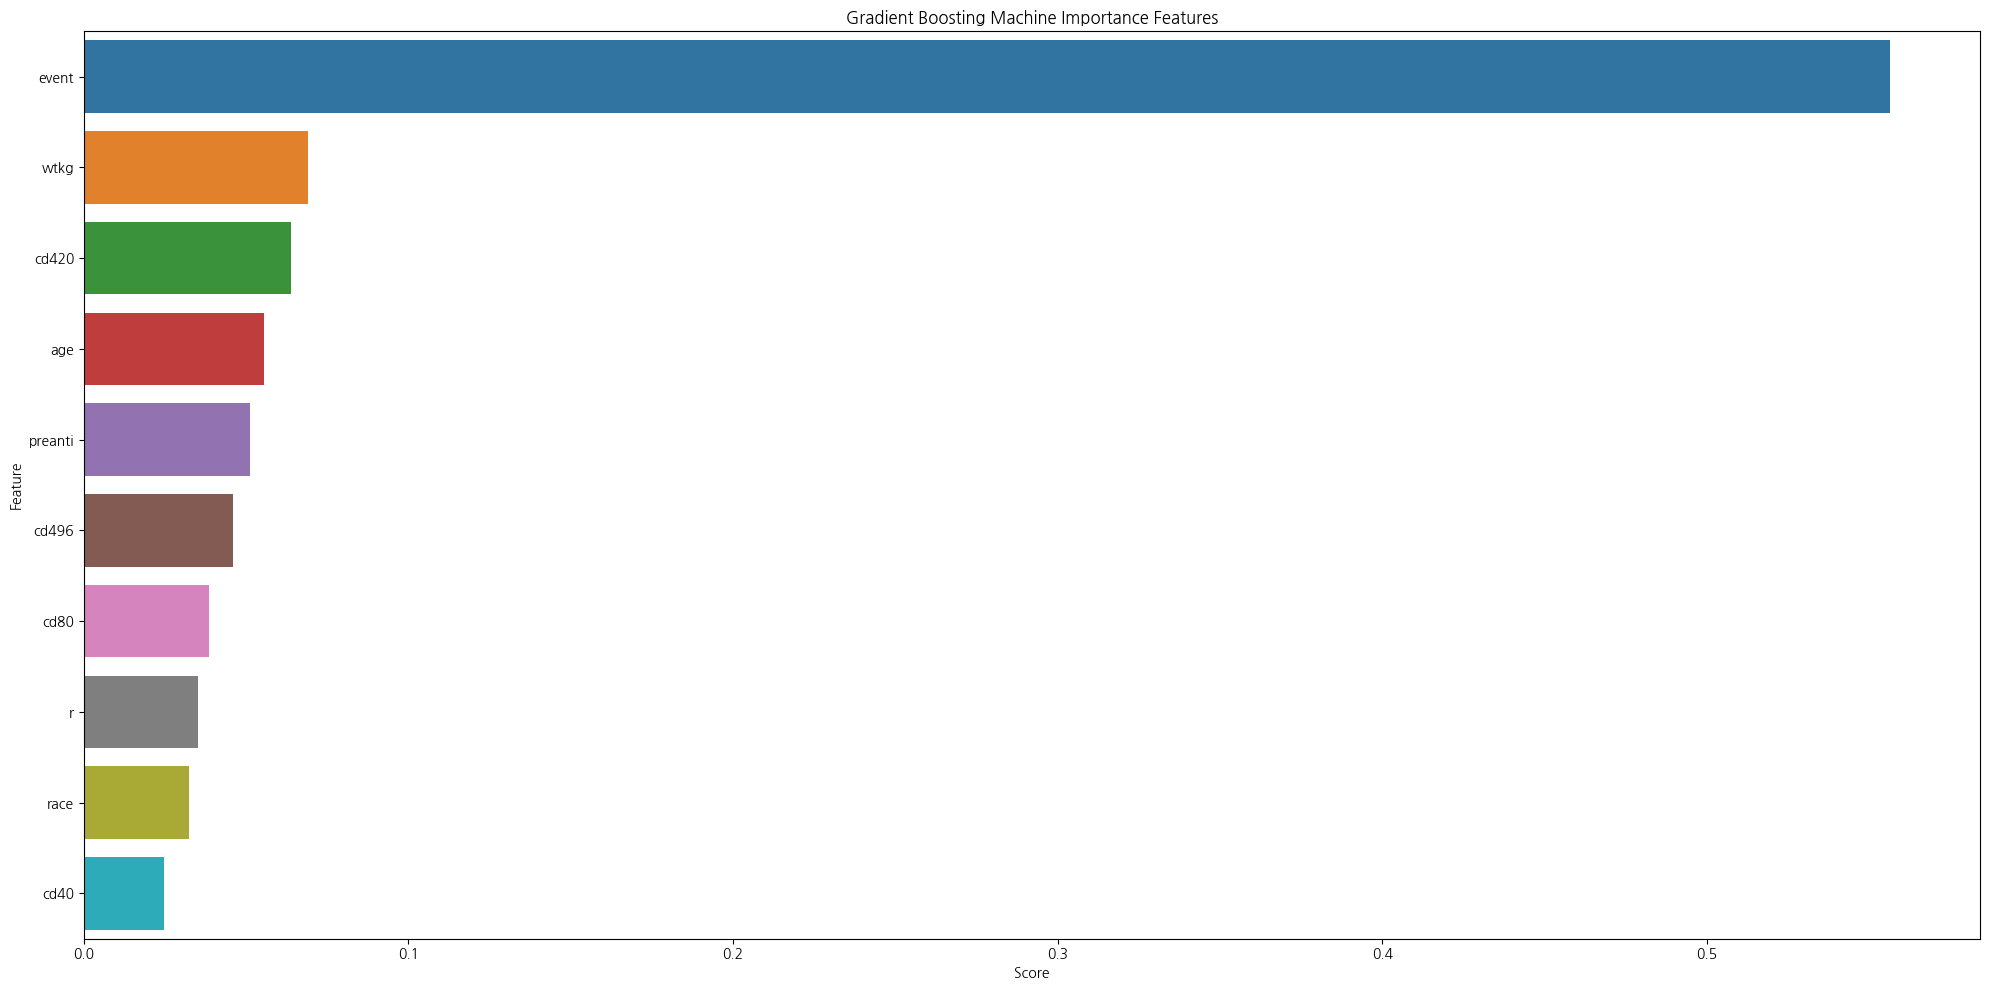

In [41]:
# Importance Score Top 10
feature_map_20 = feature_map.iloc[:10]
plt.figure(figsize=(20, 10))
sns.barplot(x="Score", y="Feature", data=feature_map_20.sort_values(by="Score", ascending=False), errwidth=40)
plt.title('Gradient Boosting Machine Importance Features')
plt.tight_layout()
plt.show()